# PERBANDINGAN ALGORITMA DECISSION TREE DAN ESEMBLE LEARNING RANDOM FOREST
Decision tree merupakan metode non parametrik yang digunakan untuk klasifikasi dan regresi. Tujuan dari decision tree adalah membuat model yang memprediksi nilai variabel target dengan mengikuti aturan keputusan sederhana dari fitur data yang tersedia.

Ensemble learning adalah metode dimana beberapa algoritma digunakan secara bersamaan. Tujuan ensemble learning adalah agar sistem dapat membuat prediksi yang lebih akurat daripada hanya menggunakan satu algoritma. Salah satu algoritma esemble learning adalah random forest. Random forest adalah suatu algoritma yang digunakan pada klasifikasi data dalam jumlah yang besar. Klasifikasi random forest dilakukan melalui penggabungan pohon dengan melakukan training pada sampel data yang dimiliki.

## Problem scope
Index manusia pembangunan ( IPM ) merupakan indikator untuk mengukur keberhasilan dalam upaya membangun kualitas hidup manusia. IPM menjelaskan bagaimana penduduk dapat mengakses hasil pembangunan dalam memperoleh pendapatan, kesehatan, pendidikan dan sebagainya. Beberapa penduduk masih banyak yang memiliki IPM dibawah yang belum terpantau pemerintah untuk melakukan pembangunan. Untuk mengatasi masalah tersebut diharapkan penduduk mengirim data untuk dinilai IPM dan untuk penduduk yang memiliki IPM dibawah akan lebih diperhatikan dalam hal pembangunan.

## data acquisition
Data yang digunakan dalam menyelesaikan masalah IPM adalah data penduduk yang sudah di rangkum dalam dataset sebanyak 2196 data. Pada dataset ini memiliki beberapa fitur dan sebuah target yaitu indikator IPM.

#### keterangan data target
1 -> Heigh

2 -> Normal

3 -> Veri-High

4 -> Low

In [64]:
# import library
import pandas as pd
import seaborn as sns
import joblib
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

membaca data IPM

In [65]:
df = pd.read_csv('IPM.csv')

df.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.90,7148,9.48,65.28,Normal
2,14.32,8776,8.68,67.43,Normal
3,14.60,8180,8.88,64.40,Normal
4,14.01,8030,9.67,68.22,Normal


## Data exploration

Data yang digunakan dalam pelatihan model harus sudah sesuai dengan ketentuan seperti tipe data harus numerik, tidak ada nilai null, dan semua fitur harus ada hubungannya dengan target.

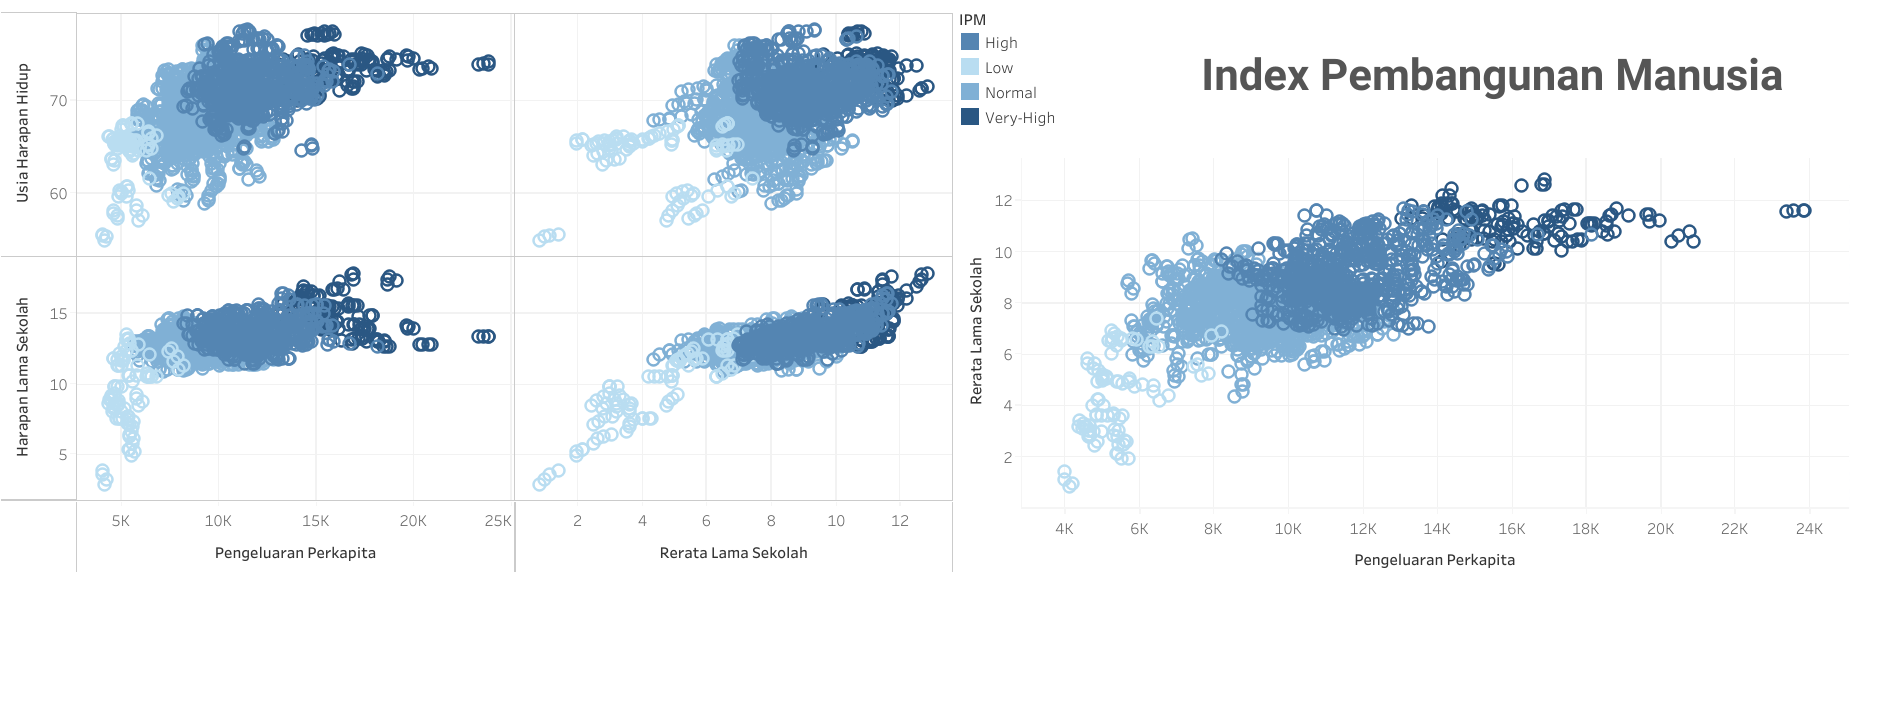

In [66]:
from IPython.display import Image
Image(filename='visualisasi.png')

Hasil visualisasi scatter plot diatas menggambarkan bahwa korelasi setiap fitur-fitur dengan data target bisa dikatakan positif, dapat dilihat bahwa semakin kecil nilainya maka indikator IPM mencapai level low dan sebaliknya semakin besar nilainya maka indikator IPM mencapai level very-high.

<AxesSubplot:xlabel='IPM', ylabel='count'>

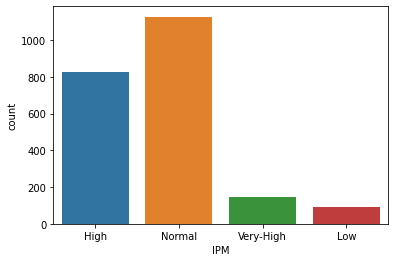

In [67]:
sns.countplot(df['IPM'])

- proporsi indikator pada data target yang paling banyak adalah normal dan yang paling sedikit adalah low

In [68]:
proporsi = df.groupby(['IPM']).count()['Harapan_Lama_Sekolah'] / df['IPM'].count() * 100
labels = proporsi.keys()

for i in range(len(proporsi)):
    print(f'{labels[i]} = {int(proporsi[i])}%')

High = 37%
Low = 4%
Normal = 51%
Very-High = 6%


Proporsi dari level indikator IPM yang paling banyak adalah normal dan yang paling sedikit adalah low.

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Harapan_Lama_Sekolah   2196 non-null   float64
 1   Pengeluaran_Perkapita  2196 non-null   int64  
 2   Rerata_Lama_Sekolah    2196 non-null   float64
 3   Usia_Harapan_Hidup     2196 non-null   float64
 4   IPM                    2196 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 85.9+ KB


Informasi tipe data setiap fitur sudah berbentuk numerik, namun untuk data target masih berbentuk object, maka tipe data pada data target harus diubah dulu menjadi numerik agar dapat dilakukan proses pemodelan.

In [70]:
encoder = ce.OrdinalEncoder(cols=['IPM'])

df = encoder.fit_transform(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Harapan_Lama_Sekolah   2196 non-null   float64
 1   Pengeluaran_Perkapita  2196 non-null   int64  
 2   Rerata_Lama_Sekolah    2196 non-null   float64
 3   Usia_Harapan_Hidup     2196 non-null   float64
 4   IPM                    2196 non-null   int32  
dtypes: float64(3), int32(1), int64(1)
memory usage: 77.3 KB


In [71]:
# mengecek apakah ada nilai data yang NULL
df.isnull().sum()

Harapan_Lama_Sekolah     0
Pengeluaran_Perkapita    0
Rerata_Lama_Sekolah      0
Usia_Harapan_Hidup       0
IPM                      0
dtype: int64

Data sudah bersih dari nilai NULL dan setiap tipe data sudah berbentuk numerik maka selanjutnya dilakukan proses pemisahan untuk data fitur dan data target

In [72]:
X = df.drop(['IPM'], axis=1)
y = df['IPM']

Setelah dipisah maka dilakukan proses split data untuk data training dan data test.


In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

#### Balancing Data

Proporsi setiap level indikator IPM belum balance, sehingga model yang dihasilkan kemungkinan masih dapat ditingkatkan dengan menyamakan proporsi setiap level indikator IPM.

In [74]:
from imblearn.over_sampling import SMOTE
SMOTE = SMOTE()

X_train, y_train = SMOTE.fit_resample(X_train, y_train)

<AxesSubplot:xlabel='IPM', ylabel='count'>

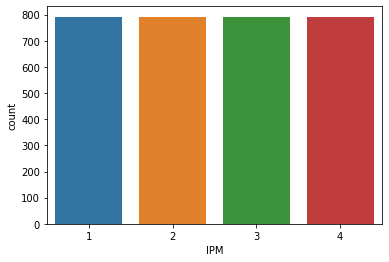

In [75]:
sns.countplot(y_train)

## Modeling



In [76]:
random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, criterion="entropy")
random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10)

In [77]:
y_pred_train_rf = random_forest.predict(X_train)
y_pred_test_rf = random_forest.predict(X_test)

In [78]:
print('Training set score: {:.2f}'.format(random_forest.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(random_forest.score(X_test, y_test)))

Training set score: 1.00
Test set score: 0.97


#### Menyimpan Model


In [79]:
joblib.dump((random_forest), "model_ipm_rf.model")


['model_ipm_rf.model']

## Evaluation model
Hasil score akurasi dari model Decission Tree maupun Random forest cenderung sudah baik, karena selisih akurasi antara data test dan data train < 5%.

In [80]:
cm_rf = confusion_matrix(y_test, y_pred_test_rf)

print('Confusion matrix dari model Random Forest: \n', cm_rf)

Confusion matrix dari model Random Forest: 
 [[235  12   1   0]
 [  7 328   0   1]
 [  1   0  42   0]
 [  0   1   0  31]]


In [81]:
print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

           1       0.97      0.95      0.96       248
           2       0.96      0.98      0.97       336
           3       0.98      0.98      0.98        43
           4       0.97      0.97      0.97        32

    accuracy                           0.97       659
   macro avg       0.97      0.97      0.97       659
weighted avg       0.97      0.97      0.97       659



## Kesimpulan

- Perbandingan model Decission Tree dengan Random Forest bisa dikatakan sama sama baik, namun pada percobaan ini algortima Decission Tree mendapat tingkat akurasi 96%, sedangkan Random Forest mendapat tingkat akurasi 97%, maka algoritma Random Forest lebih baik dari pada algoritma Decission Tree dengan selisih tingkat akurasi sebesar 1%.

- Setelah dilakukan balancing data (meratakan proporsi level indikator IPM) menghasilkan tingkat akurasi yang sama yaitu 97% pada data test.

- Balancing data belum tentu dapat membuat model semakin baik jika perbedaan proporsi tidak terlalu signifikan, di percobaan ini perbedaan proporsinya:
    - High = 37%
    - Low = 4%
    - Normal = 51%
    - Very-High = 6%

- Perbandingan model dengan data tidak balance pada percobaan ini dapat dikatakan tingkat akurasinya sama baiknya.

- Pada percobaan ini model yang terbaik adalah menggunakan algoritma random forest dengan tingkat akurasi mencapai 97%.